In [1]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
from __future__ import division
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

> Import data

In [2]:
with open("movie_data.pkl", 'r') as picklefile: 
    df = pickle.load(picklefile)

> Add studio variable

In [3]:
df.rename(columns={'Sci-Fi': 'Sci_Fi'}, inplace=True)
df.head()

,duration,gross,metacritic,opening,rating,release,studio,title,month,Action,...,Horror,Music,Musical,Mystery,Romance,Sci_Fi,Sport,Thriller,War,Western
/title/tt0035423/,118,47095453,44,2562448.0,PG-13,2001-12-25,Konrad Pictures,Kate & Leopold,12,0,...,0,0,0,0,1,0,0,0,0,0
/title/tt0118589/,104,4273372,14,2414596.0,PG-13,2001-09-21,Twentieth Century Fox Film Corporation,Glitter,9,0,...,0,1,0,0,1,0,0,0,0,0
/title/tt0118694/,98,2734044,85,138340.5,PG,2001-03-09,Block 2 Pictures,In the Mood for Love,3,0,...,0,0,0,0,1,0,0,0,0,0
/title/tt0118926/,132,2377348,64,92433.0,R,2003-05-23,Fox Searchlight Pictures,The Dancer Upstairs,5,0,...,0,0,0,0,0,0,0,1,0,0
/title/tt0120202/,105,6920692,75,580163.0,R,2001-01-12,Filmtown Entertainment,State and Main,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
studio = df['studio'].str.get_dummies()
studio.head()

,"""DIA"" Productions GmbH & Co. KG",10th Hole Productions,120 Films,120dB Films,13th Night Productions,1492 Pictures,19 Entertainment,1984 Private Defense Contractors,2 Loop Films,2-Team Productions,...,Zeynofilm,Zik Zak Kvikmyndir,Zininsa Film Production,Zion Films,double A Films,erbp,i5 Films,iDeal Partners Film Fund,micro_scope,nWave Pictures
/title/tt0035423/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_studio = df.join(studio)

In [9]:
df_studio.head()

,duration,gross,metacritic,opening,rating,release,studio,title,month,Action,...,Zeynofilm,Zik Zak Kvikmyndir,Zininsa Film Production,Zion Films,double A Films,erbp,i5 Films,iDeal Partners Film Fund,micro_scope,nWave Pictures
/title/tt0035423/,118,47095453,44,2562448.0,PG-13,2001-12-25,Konrad Pictures,Kate & Leopold,12,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,104,4273372,14,2414596.0,PG-13,2001-09-21,Twentieth Century Fox Film Corporation,Glitter,9,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,98,2734044,85,138340.5,PG,2001-03-09,Block 2 Pictures,In the Mood for Love,3,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,132,2377348,64,92433.0,R,2003-05-23,Fox Searchlight Pictures,The Dancer Upstairs,5,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,105,6920692,75,580163.0,R,2001-01-12,Filmtown Entertainment,State and Main,1,0,...,0,0,0,0,0,0,0,0,0,0


> Re-index by title

In [10]:
df_studio = df_studio.set_index('title')

In [11]:
df_studio.head()

,duration,gross,metacritic,opening,rating,release,studio,month,Action,Adventure,...,Zeynofilm,Zik Zak Kvikmyndir,Zininsa Film Production,Zion Films,double A Films,erbp,i5 Films,iDeal Partners Film Fund,micro_scope,nWave Pictures
title,,,,,,,,,,,,,,,,,,,,,
Kate & Leopold,118,47095453,44,2562448.0,PG-13,2001-12-25,Konrad Pictures,12,0,0,...,0,0,0,0,0,0,0,0,0,0
Glitter,104,4273372,14,2414596.0,PG-13,2001-09-21,Twentieth Century Fox Film Corporation,9,0,0,...,0,0,0,0,0,0,0,0,0,0
In the Mood for Love,98,2734044,85,138340.5,PG,2001-03-09,Block 2 Pictures,3,0,0,...,0,0,0,0,0,0,0,0,0,0
The Dancer Upstairs,132,2377348,64,92433.0,R,2003-05-23,Fox Searchlight Pictures,5,0,0,...,0,0,0,0,0,0,0,0,0,0
State and Main,105,6920692,75,580163.0,R,2001-01-12,Filmtown Entertainment,1,0,0,...,0,0,0,0,0,0,0,0,0,0


> Test and train split

In [12]:
test = df_studio[df_studio['release'] >= '2011-01-01 00:00:00']
train = df_studio[df_studio['release'] < '2011-01-01 00:00:00']

print len(train), len(test)
print len(test) / (len(train) + len(test))

2967 1124
0.274749450012


> Investigate month variable

In [13]:
monthly = train.groupby(['month'])['metacritic'].mean()

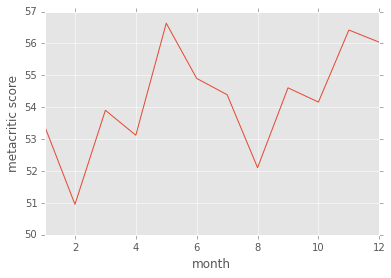

In [14]:
monthly.plot(x='month', y='metacritic')
plt.ylabel('metacritic score')

> Reset y-axis to start at 0

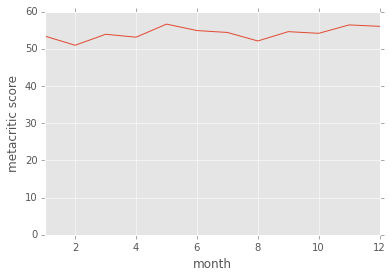

In [15]:
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,60))

monthly.plot(x='month', y='metacritic')
plt.ylabel('metacritic score')

In [16]:
monthly

month
1     53.420635
2     50.954128
3     53.904580
4     53.122530
5     56.635965
6     54.904306
7     54.393617
8     52.105263
9     54.609121
10    54.162791
11    56.422481
12    56.040000
Name: metacritic, dtype: float64

> Investigate production studios

In [17]:
studios = train.groupby(['studio'])

studios_freq = studios.filter(lambda x: len(x) > 4)
top_studios = studios_freq.groupby(['studio']).size().order(ascending=False)[:20]


for studio in top_studios.index:
    print studio

Universal Pictures
Warner Bros.
Paramount Pictures
Twentieth Century Fox Film Corporation
New Line Cinema
Columbia Pictures Corporation
Touchstone Pictures
DreamWorks SKG
Walt Disney Pictures
Columbia Pictures
Metro-Goldwyn-Mayer (MGM)
Miramax
Dimension Films
Fox Searchlight Pictures
Revolution Studios
Screen Gems
Fox 2000 Pictures
Lionsgate
Focus Features
Castle Rock Entertainment


In [18]:
train.sort(['metacritic'], ascending=False)[:10]

,duration,gross,metacritic,opening,rating,release,studio,month,Action,Adventure,...,Zeynofilm,Zik Zak Kvikmyndir,Zininsa Film Production,Zion Films,double A Films,erbp,i5 Films,iDeal Partners Film Fund,micro_scope,nWave Pictures
title,,,,,,,,,,,,,,,,,,,,,
Pan's Labyrinth,118,37623143,98,501691.0,R,2007-01-19,Estudios Picasso,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"4 Months, 3 Weeks and 2 Days",113,1185783,97,51712.0,UNRATED,2007-09-14,Mobra Films,9,0,0,...,0,0,0,0,0,0,0,0,0,0
Ratatouille,111,206445654,96,47027395.0,G,2007-06-29,Pixar Animation Studios,6,0,0,...,0,0,0,0,0,0,0,0,0,0
The Social Network,120,96917897,95,22445653.0,PG-13,2010-10-01,Columbia Pictures,10,0,0,...,0,0,0,0,0,0,0,0,0,0
Sideways,126,71502303,94,207042.0,R,2005-01-21,Fox Searchlight Pictures,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Spirited Away,125,10049886,94,1052197.0,PG,2003-03-28,Tokuma Shoten,3,0,1,...,0,0,0,0,0,0,0,0,0,0
The Hurt Locker,131,17017811,94,145352.0,R,2009-07-31,Voltage Pictures,7,0,0,...,0,0,0,0,0,0,0,0,0,0
WALL·E,98,223808164,94,63087526.0,G,2008-06-27,Walt Disney Pictures,6,0,1,...,0,0,0,0,0,0,0,0,0,0
The Lord of the Rings: The Return of the King,201,377845905,94,22532641.5,PG-13,2003-12-17,New Line Cinema,12,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
studio_meta = train.groupby(['studio'])['metacritic'].mean()
studio_meta.sort(ascending=False)
studio_meta[:10]

studio
Mobra Films                              97
Pixar Animation Studios                  96
Voltage Pictures                         94
Tokuma Shoten                            94
Asia Union Film & Entertainment Ltd.     93
Soudaine Compagnie                       92
AtomFilms                                92
Filmi Doomireew                          91
Aboriginal Peoples Television Network    91
2.4.7. Films                             90
Name: metacritic, dtype: float64

In [20]:
train[train['studio'] == 'Aboriginal Peoples Television Network']

,duration,gross,metacritic,opening,rating,release,studio,month,Action,Adventure,...,Zeynofilm,Zik Zak Kvikmyndir,Zininsa Film Production,Zion Films,double A Films,erbp,i5 Films,iDeal Partners Film Fund,micro_scope,nWave Pictures
title,,,,,,,,,,,,,,,,,,,,,
Atanarjuat: The Fast Runner,172,3786801,91,36342,R,2002-07-26,Aboriginal Peoples Television Network,7,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
studios_freq.groupby(['studio'])['metacritic'].mean().order(ascending=False)[:20]

studio
Why Not Productions                       82.800000
Beijing New Picture Film Co.              74.600000
Bandai Visual Company                     74.166667
HBO Films                                 73.500000
Haut et Court                             72.400000
CJ Entertainment                          71.333333
Alicéléo                                  71.000000
Arte France Cinéma                        70.200000
Fidélité Productions                      68.857143
Warner Independent Pictures (WIP)         68.571429
Fandango                                  68.200000
Focus Features                            68.000000
Canal+ España                             67.285714
Sony Pictures Classics                    67.000000
X-Filme Creative Pool                     65.800000
BBC Films                                 65.214286
British Broadcasting Corporation (BBC)    65.125000
Paramount Vantage                         64.250000
DreamWorks Animation                      64.066667
Fox S

In [22]:
train[train['studio'] == 'HBO Films']

,duration,gross,metacritic,opening,rating,release,studio,month,Action,Adventure,...,Zeynofilm,Zik Zak Kvikmyndir,Zininsa Film Production,Zion Films,double A Films,erbp,i5 Films,iDeal Partners Film Fund,micro_scope,nWave Pictures
title,,,,,,,,,,,,,,,,,,,,,
Real Women Have Curves,90,5844929,71,183772,PG-13,2002-11-08,HBO Films,11,0,0,...,0,0,0,0,0,0,0,0,0,0
Elephant,81,1227000,70,1229210,R,2003-11-14,HBO Films,11,0,0,...,0,0,0,0,0,0,0,0,0,0
Maria Full of Grace,101,6517198,87,139066,R,2004-08-06,HBO Films,8,0,0,...,0,0,0,0,0,0,0,0,0,0
Last Days,97,454711,67,306933,R,2005-05-13,HBO Films,5,0,0,...,0,0,0,0,0,0,0,0,0,0
The Notorious Bettie Page,91,1410778,64,143131,R,2006-05-05,HBO Films,5,0,0,...,0,0,0,0,0,0,0,0,0,0
Sugar,114,1081922,82,60140,R,2009-04-24,HBO Films,4,0,0,...,0,0,0,0,0,0,0,0,0,0


> Build first model using duration, gross, opening, rating, and month

In [23]:
y, X = dmatrices('metacritic ~ duration + gross + opening + rating + month', 
                 data=train, return_type='dataframe')

In [24]:
model1 = sm.OLS(y, X)
results1 = model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     63.66
Date:                Tue, 14 Jul 2015   Prob (F-statistic):          3.55e-107
Time:                        15:51:08   Log-Likelihood:                -12462.
No. Observations:                2967   AIC:                         2.494e+04
Df Residuals:                    2957   BIC:                         2.500e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            33.8834      2.654     12.765      0.000        28.679    39.088
rating[T.NC-17]       2.3533      5.813      0.405      0.686        -9.045    13.751
rating[T.PG]         -7.5065      2.279     -3.294      0.001       -11.975    -3.038
rating[T.PG-13]     -10.0647      2.195     -4.586      0.000       -14.368    -5.761
rating[T.R]          -2.7142      2.204     -1.232      0.218        -7.035     1.607
rating[T.UNRATED]     8.2000      2.409      3.403      0.001         3.476    12.924
duration              0.2243      0.017     13.133      0.000         0.191     0.258
gross              5.243e-08   7.89e-09      6.642      0.000       3.7e-08  6.79e-08
opening           -1.662e-07   3.51e-08     -4.733      0.000     -2.35e-07 -9.74e-08
month                 0.1011      0.086      1.176      0.240        -0.068     0.270
==============================================================================
Omnibus:                       39.815   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.605
Skew:                          -0.077   Prob(JB):                     2.75e-06
Kurtosis:                       2.571   Cond. No.                     1.43e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
y_test, X_test = dmatrices('metacritic ~ duration + gross + opening + rating + month', 
                           data=test, return_type='dataframe')

predict1 = results1.predict(X_test)

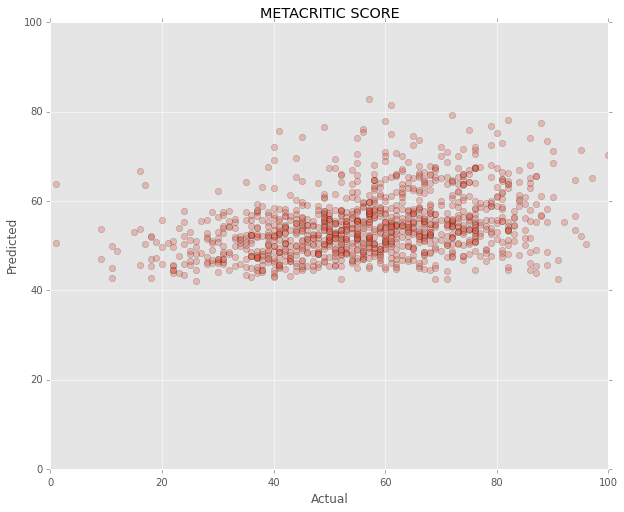

In [26]:
plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot(y_test, predict1, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('METACRITIC SCORE')

> Add genre columns and build another model

In [27]:
train2 = train.drop('release', axis=1).drop('studio', axis=1)

In [28]:
train2 = train2.drop(train2.columns[26:], axis=1)

In [30]:
train2.columns

Index([u'duration', u'gross', u'metacritic', u'opening', u'rating', u'month',
       u'Action', u'Adventure', u'Animation', u'Biography', u'Comedy',
       u'Crime', u'Drama', u'Family', u'Fantasy', u'History', u'Horror',
       u'Music', u'Musical', u'Mystery', u'Romance', u'Sci_Fi', u'Sport',
       u'Thriller', u'War', u'Western'],
      dtype='object')

In [32]:
all_columns = '+'.join(train2.columns - ['metacritic'])

y2, X2 = dmatrices('metacritic ~ ' + all_columns, 
                 data=train2, return_type='dataframe')

In [33]:
model2 = sm.OLS(y2, X2)
results2 = model2.fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     41.22
Date:                Tue, 14 Jul 2015   Prob (F-statistic):          2.47e-193
Time:                        15:52:07   Log-Likelihood:                -12218.
No. Observations:                2967   AIC:                         2.450e+04
Df Residuals:                    2937   BIC:                         2.468e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            32.4376      3.118     10.403      0.000        26.324    38.552
rating[T.NC-17]       8.7249      5.548      1.573      0.116        -2.153    19.602
rating[T.PG]         -1.6445      2.215     -0.742      0.458        -5.988     2.699
rating[T.PG-13]      -1.2575      2.411     -0.522      0.602        -5.984     3.469
rating[T.R]           5.4897      2.429      2.260      0.024         0.726    10.253
rating[T.UNRATED]    13.2997      2.559      5.196      0.000         8.281    18.318
Action               -6.1102      0.916     -6.671      0.000        -7.906    -4.314
Adventure            -0.3863      1.019     -0.379      0.705        -2.384     1.611
Animation            12.2199      1.632      7.490      0.000         9.021    15.419
Biography             2.5569      1.271      2.012      0.044         0.065     5.049
Comedy               -2.8131      0.758     -3.710      0.000        -4.300    -1.326
Crime                -1.9715      0.831     -2.373      0.018        -3.601    -0.342
Drama                 8.3002      0.784     10.587      0.000         6.763     9.837
Family               -0.2279      1.448     -0.157      0.875        -3.067     2.611
Fantasy              -2.3536      1.228     -1.916      0.055        -4.762     0.055
History               1.1613      1.776      0.654      0.513        -2.322     4.644
Horror               -8.6251      1.253     -6.882      0.000       -11.082    -6.168
Music                -1.6737      1.432     -1.169      0.243        -4.482     1.134
Musical              -2.5964      2.284     -1.137      0.256        -7.075     1.882
Mystery              -1.8943      1.069     -1.772      0.077        -3.991     0.202
Romance              -2.6119      0.750     -3.482      0.001        -4.083    -1.141
Sci_Fi               -1.1948      1.368     -0.873      0.383        -3.877     1.488
Sport                -2.5075      1.655     -1.515      0.130        -5.754     0.738
Thriller             -1.5175      0.937     -1.619      0.105        -3.355     0.320
War                   1.8323      1.898      0.966      0.334        -1.889     5.553
Western               0.0652      4.188      0.016      0.988        -8.146     8.276
duration              0.1471      0.018      8.388      0.000         0.113     0.181
gross              7.386e-08    7.7e-09      9.595      0.000      5.88e-08   8.9e-08
month                 0.0633      0.080      0.794      0.427        -0.093     0.220
opening           -1.171e-07   3.31e-08     -3.538      0.000     -1.82e-07 -5.22e-08
==============================================================================
Omnibus:                       19.572   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.966
Skew:   

In [34]:
y_test, X_test = dmatrices('metacritic ~ ' + all_columns, 
                           data=test, return_type='dataframe')

predict2 = results2.predict(X_test)

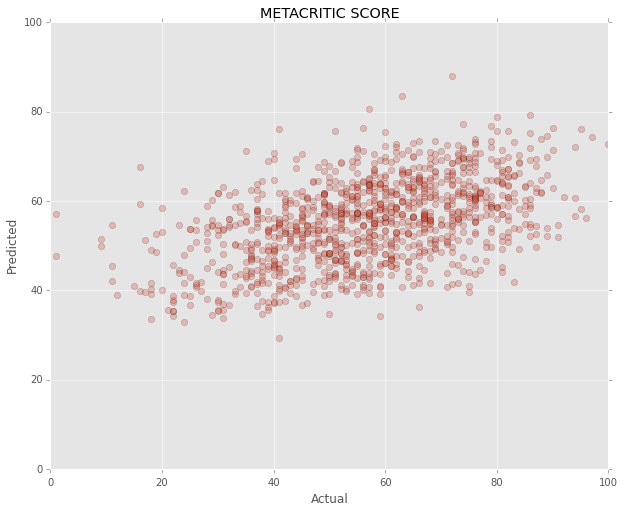

In [35]:
plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot(y_test, predict2, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('METACRITIC SCORE')